In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [ ]:
#Lukasz (Luke) Grzybek DSC478

In [6]:
trainmatrix = pd.read_table("C:\\Users\\Luke\\Desktop\\newsgroups\\trainMatrixModified.txt", sep="\t", header=None)
testmatrix = pd.read_table("C:\\Users\\Luke\\Desktop\\newsgroups\\testMatrixModified.txt", sep="\t", header=None)
trainClasses = pd.read_table("C:\\Users\\Luke\\Desktop\\newsgroups\\trainClasses.txt", sep="\t", header=None, index_col = 0)
testClasses = pd.read_table("C:\\Users\\Luke\\Desktop\\newsgroups\\testClasses.txt", sep="\t", header=None,index_col = 0)
terms = pd.read_table("C:\\Users\\Luke\\Desktop\\newsgroups\\modifiedterms.txt", sep="\t", header=None)

In [7]:
trainmatrix = np.array(trainmatrix)
trainmatrix = trainmatrix.T
trainmatrix.shape


(800, 5500)

In [8]:
testmatrix = np.array(testmatrix)
testmatrix = testmatrix.T
testmatrix.shape


(200, 5500)

In [9]:
trainClasses = np.array(trainClasses).flatten()
trainClasses.shape

(800,)

In [10]:
testClasses = np.array(testClasses).flatten()
testClasses.shape

(200,)

In [8]:
#a
def knn(trainmatrix,trainlabels,instance,k,distance):
    measure = 0
    if distance == 0:
        measure = np.sqrt(np.sum((trainmatrix-instance)**2,axis=1))
    elif distance == 1:
        num = np.dot(trainmatrix,instance)
        distances = []
        for i in range(len(trainmatrix)):
           
            tmnorm = np.linalg.norm(trainmatrix[i])
            den = tmnorm * np.linalg.norm(instance)
            dist = 1 - (num/den)
            distances.append(dist)
        measure = distances[0]
    index = np.argsort(measure)
    nlabels = trainClasses[index[0:k]]
    count = Counter(nlabels)
    predicted = count.most_common(1)[0][0]



    return index[0:k], predicted


    

In [9]:
neigh_idx, pclass = knn(trainmatrix,trainClasses,testmatrix[7],5,0)

In [10]:
neigh_idx

array([798, 757, 743,  38, 224], dtype=int64)

In [11]:
pclass

1

In [12]:
#b
def evalknn(trainmatrix,trainlabels,testmatrix,testClasses,k,measure):
    c = 0
    predlabels = []
    for instance in testmatrix:
        neigh_idx, pred_label = knn(trainmatrix,trainlabels,instance,k,measure)
        predlabels.append(pred_label)
    predlabels = np.array(predlabels)
    for i in range(len(predlabels)):
        if predlabels[i] == testClasses[i]:
            c += 1
    accuracy = c/len(testClasses)
    
    return accuracy
        

In [13]:
a = evalknn(trainmatrix, trainClasses, testmatrix,testClasses,5,0)
        
        

In [14]:
a

0.815

0.815
0.85
0.785
0.765
0.73
0.725
0.69
0.7
0.655
0.67
0.655
0.66
0.625
0.625
0.63
0.615
0.615
0.61
0.605
0.605
0.625
0.71
0.955
0.955
0.96
0.97
0.975
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.975
0.975
0.975
0.975
0.98
0.975


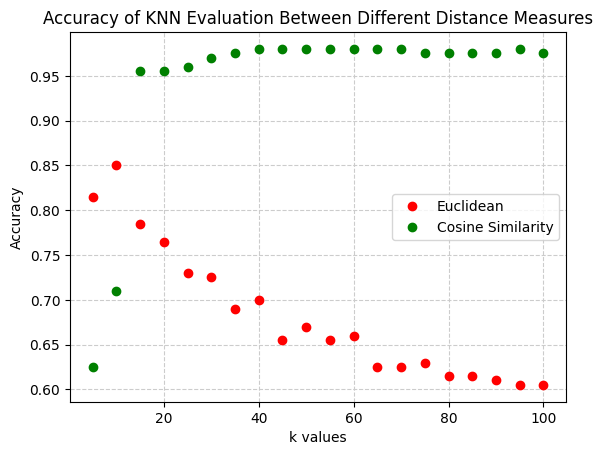

In [15]:
#c
ktests = np.linspace(5,100,20)
plt.figure()


euclidean = []
#euclidean distance
for k in ktests:
    k = int(k)
    a = evalknn(trainmatrix, trainClasses, testmatrix,testClasses,k,0)
    print(a)
    euclidean.append(a)

euclidean = np.array(euclidean)   
plt.plot(ktests,euclidean,'ro',label = 'Euclidean')

#cosine similarity 

cs = []
#cosine similarity 
for k in ktests:
    k = int(k)
    b = evalknn(trainmatrix, trainClasses, testmatrix,testClasses,k,1)
    print(b)
    cs.append(b)

cs = np.array(cs)   
plt.plot(ktests,cs,'go',label = 'Cosine Similarity')


plt.grid(linestyle='--',color=[.8,.8,.8])
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Evaluation Between Different Distance Measures')
plt.legend()

In [16]:
#d

traindf = pd.DataFrame([(trainmatrix!=0).sum(1)]).T
Ntrain=np.ones(np.shape(trainmatrix), dtype=float)*trainmatrix.shape[1]
IDF = np.log2(np.divide(Ntrain, np.array(traindf)))
TD_tfidf_train = trainmatrix * IDF
print(TD_tfidf_train)

test_tfidf = []
for i in range(len(testmatrix)):
    tests = testmatrix[i] * IDF[i]
    test_tfidf.append(tests)

test_tfidf = np.array(test_tfidf)
print(test_tfidf)

[[11.62101212 11.62101212 11.62101212 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [6.99895115 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


0.85
0.9
0.97
0.965
0.965
0.97
0.98
0.975
0.98
0.975
0.975
0.98
0.98
0.98
0.98
0.975
0.98
0.98
0.98
0.975


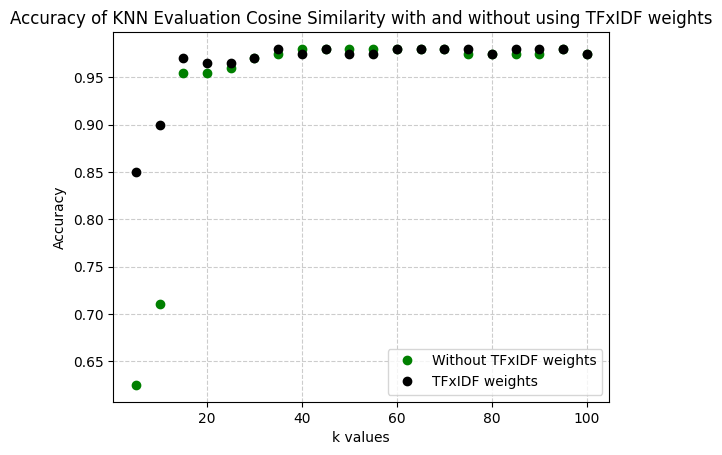

In [17]:

ktests = np.linspace(5,100,20)
plt.figure()


cs_TFxIDF = []

for k in ktests:
    k = int(k)
    c = evalknn(TD_tfidf_train, trainClasses, test_tfidf,testClasses,k,1)
    print(c)
    cs_TFxIDF.append(c)

cs_TFxIDF = np.array(cs_TFxIDF)   
plt.plot(ktests,cs,'go',label = 'Without TFxIDF weights')
plt.plot(ktests,cs_TFxIDF,'ko',label = 'TFxIDF weights')



plt.grid(linestyle='--',color=[.8,.8,.8])
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Evaluation Cosine Similarity with and without using TFxIDF weights')
plt.legend()

In [18]:
#e

def Rocchio_Train(train, labels):
    p = np.zeros((len(np.unique(labels)),train.shape[1]))
    for x in train[labels==0]:
        p[0] += x
    for z in train[labels==1]:
        p[1] += z
    return p


In [19]:
proto = Rocchio_Train(TD_tfidf_train, trainClasses)

In [20]:
proto.shape

(2, 5500)

In [21]:
def Rocchio_classifier(prototype, testmatrix):  
    sims = np.zeros([prototype.shape[0],testmatrix.shape[0]])
    m = -2
    for p in range(prototype.shape[0]):
        for i in range(testmatrix.shape[0]):
            num = np.dot(prototype[p],testmatrix[i])
            den = np.linalg.norm(prototype[p]) * np.linalg.norm(testmatrix[i])
            sim = num/den
            if sim > -2:
                m = sim
                sims[p,i] += m
            else:
                sims[p,i] += m
    sims = sims.T
    indexes = np.zeros([sims.shape[0],1])
    
    for r in range(sims.shape[0]):
        a =  np.argmax(sims[r])
        indexes[r,0] += a
    pred_labels = np.int32(indexes)



    return sims, pred_labels

In [22]:
sims, pred_labels = Rocchio_classifier(proto, test_tfidf)

In [23]:
pred_labels

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [24]:

def rocchio_evaluate(testmatrix, test_lab, prototype):
    sims, pred_labels = Rocchio_classifier(prototype, testmatrix)
    c = 0
    for i in range(len(pred_labels)):
        if pred_labels[i] == test_lab[i]:
            c += 1
    accuracy = c/len(test_lab)
    return accuracy

In [25]:
a = rocchio_evaluate(test_tfidf, testClasses, proto)

In [26]:
a

0.96

(20,)


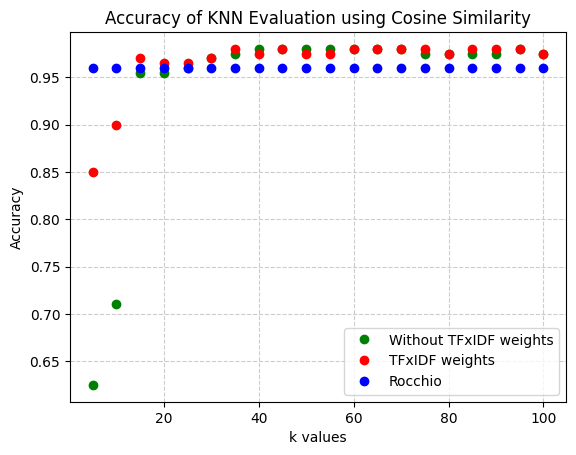

In [27]:
plt.figure()

rocchio = np.zeros([20])
for x in range(len(rocchio)):
    rocchio[x] += a
print(rocchio.shape)
 
plt.plot(ktests,cs,'go',label = 'Without TFxIDF weights')
plt.plot(ktests,cs_TFxIDF,'ro',label = 'TFxIDF weights')
plt.plot(ktests,rocchio,'bo',label = 'Rocchio')



plt.grid(linestyle='--',color=[.8,.8,.8])
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Evaluation using Cosine Similarity')
plt.legend()

With an accuracy score of 0.96, the Rocchio performed slightly worse than most of the time (regardless of k value used) the data was evaluated using regular KNN with and without TFxIDF weights, as those accuracy scores usually ranged between 0.965 and 0.98.

In [53]:
#f
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(TD_tfidf_train,trainClasses)
NearestCentroid(metric = 'cosine',shrink_threshold=None)

Nc_labels = clf.predict(testmatrix)
print(Nc_labels)
  

[1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0]


In [57]:
def NearestCentroid_evaluate(Nc_labels, testClasses):
    c = 0
    for i in range(len(Nc_labels)):
        if Nc_labels[i] == testClasses[i]:
            c += 1
    accuracy = c/len(testClasses)
    return accuracy

In [58]:
a2 = NearestCentroid_evaluate(Nc_labels,testClasses)

In [59]:
a2

0.77

Rocchio from part e had a higher  accuracy rate 0.96 when compared to the accuracy rate 0.77 from scikit-learn's NearestCentroid.

In [11]:
#Part 2
#a
csv = pd.read_csv("C:\\Users\\Luke\\Desktop\\adult-modified1(1).csv")

In [12]:
csv

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


In [91]:
#csv2 = csv.reindex(np.random.permutation(csv.index))


In [13]:
dummycsv = pd.get_dummies(csv[['workclass','marital-status','race','sex','income']])
dummycsv.head(10)

,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [14]:
dummycsv2 = pd.concat([csv,dummycsv],axis=1)
dummycsv2.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,workclass_Private,workclass_Public,...,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,Public,13,Single,White,Male,40,<=50K,0,1,...,1,0,0,0,0,1,0,1,1,0
1,50,Self-emp,13,Married,White,Male,13,<=50K,0,0,...,0,0,0,0,0,1,0,1,1,0
2,38,Private,9,Single,White,Male,40,<=50K,1,0,...,1,0,0,0,0,1,0,1,1,0
3,53,Private,7,Married,Black,Male,40,<=50K,1,0,...,0,0,0,1,0,0,0,1,1,0
4,28,Private,13,Married,Black,Female,40,<=50K,1,0,...,0,0,0,1,0,0,1,0,1,0
5,37,Private,14,Married,White,Female,40,<=50K,1,0,...,0,0,0,0,0,1,1,0,1,0
6,49,Private,5,Married,Black,Female,16,<=50K,1,0,...,0,0,0,1,0,0,1,0,1,0
7,52,Self-emp,9,Married,White,Male,45,>50K,0,0,...,0,0,0,0,0,1,0,1,0,1
8,31,Private,14,Single,White,Female,50,>50K,1,0,...,1,0,0,0,0,1,1,0,0,1
9,42,Private,13,Married,White,Male,40,>50K,1,0,...,0,0,0,0,0,1,0,1,0,1


In [15]:
dummycsv2 = dummycsv2.drop(columns=['workclass', 'marital-status','race','sex','income'])

In [16]:
dummycsv2 = dummycsv2.drop(columns=['income_<=50K'])

In [17]:
dummycsv2

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1,0
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1,0


In [18]:
dummycsv2_names = dummycsv2.columns.values
dummycsv2_names

array(['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_White', 'sex_Female',
       'sex_Male', 'income_>50K'], dtype=object)

In [19]:
csv_columns = dummycsv2[['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_White', 'sex_Female',
       'sex_Male']]
csv_columns.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [20]:
csv_target = dummycsv2[['income_>50K']]
csv_target.head()

,income_>50K
0,0
1,0
2,0
3,0
4,0


In [21]:
from sklearn.model_selection import train_test_split
csv_train, csv_test, csv_target_train, csv_target_test = train_test_split(csv_columns, csv_target, test_size=0.2, random_state=33)



In [125]:
print (csv_train.shape)
print (csv_test.shape)

(7529, 15)
(1883, 15)


In [126]:
#b

from sklearn import preprocessing

In [127]:
min_max_scaler = preprocessing.MinMaxScaler().fit(csv_train)
csv_train_norm = min_max_scaler.transform(csv_train)
csv_test_norm = min_max_scaler.transform(csv_test)

In [128]:
from sklearn import neighbors

In [133]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(csv_train_norm, csv_target_train.values.ravel())

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [134]:
knnpreds_test = knnclf.predict(csv_test_norm)
print(knnpreds_test)

[1 1 0 ... 0 0 1]


In [25]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(csv_target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1443
           1       0.57      0.48      0.52       440

    accuracy                           0.79      1883
   macro avg       0.71      0.69      0.70      1883
weighted avg       0.78      0.79      0.79      1883



In [26]:
from sklearn.metrics import confusion_matrix

In [138]:
knncm = confusion_matrix(csv_target_test, knnpreds_test)
print (knncm)

[[1283  160]
 [ 228  212]]


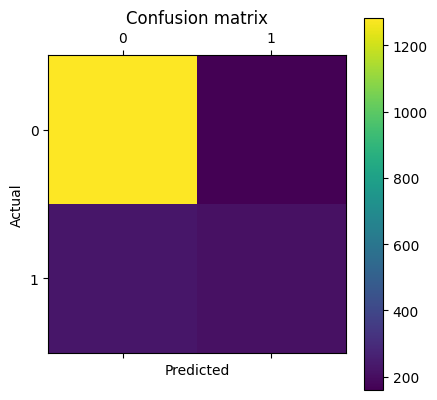

In [139]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [142]:
print (knnclf.score(csv_test_norm, csv_target_test))

0.7939458311205523


In [141]:
print (knnclf.score(csv_train_norm, csv_target_train))

0.9426218621330854


The accuracy for the test sets is 0.79. The accuracy for the train sets is 0.94

In [156]:
kvalues = np.int32(np.linspace(5,100,100))

distance_train = []
distance_test = []

for k in kvalues:
    knnclf = neighbors.KNeighborsClassifier(k, weights='distance')
    knnclf.fit(csv_train_norm, csv_target_train.values.ravel())
    knnclf.predict(csv_test_norm)
    wtest = knnclf.score(csv_test_norm, csv_target_test)
    wtrain = knnclf.score(csv_train_norm, csv_target_train)
    distance_train.append(wtrain)
    distance_test.append(wtest)
print(distance_train)
print(distance_test)

[0.9412936644972772, 0.9412936644972772, 0.9420905830787621, 0.942223402842343, 0.9424890423695046, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 0.9426218621330854, 

In [157]:
uniform_test = []
uniform_train = []

for k in kvalues:
    knnclf = neighbors.KNeighborsClassifier(k, weights='uniform')
    knnclf.fit(csv_train_norm, csv_target_train.values.ravel())
    knnclf.predict(csv_test_norm)
    utest = knnclf.score(csv_test_norm, csv_target_test)
    utrain = knnclf.score(csv_train_norm, csv_target_train)
    uniform_train.append(utrain)
    uniform_test.append(utest)
print(uniform_train)
print(uniform_test)

[0.8552264576969053, 0.8552264576969053, 0.8463275335369903, 0.8463275335369903, 0.840616283703015, 0.8387568070128835, 0.8380927081949794, 0.8367645105591712, 0.8334440164696507, 0.8343737548147164, 0.8319829990702616, 0.8327799176517465, 0.8313189002523576, 0.8318501793066808, 0.8307876211980343, 0.829459423562226, 0.8287953247443219, 0.8274671271085138, 0.8282640456899987, 0.827334307344933, 0.8278655863992562, 0.8261389294727055, 0.8266702085270288, 0.825076371364059, 0.822818435383185, 0.822818435383185, 0.8238809934918316, 0.8233497144375083, 0.8230840749103466, 0.8249435516004782, 0.8236153539646699, 0.8217558772745385, 0.8229512551467658, 0.8206933191658918, 0.8201620401115686, 0.8204276796387302, 0.8202948598751494, 0.8189666622393412, 0.8148492495683358, 0.8160446274405632, 0.8159118076769823, 0.8160446274405632, 0.8145836100411741, 0.8152477088590783, 0.816177447204144, 0.8148492495683358, 0.8147164298047549, 0.8153805286226591, 0.8149820693319166, 0.8143179705140124, 0.8143

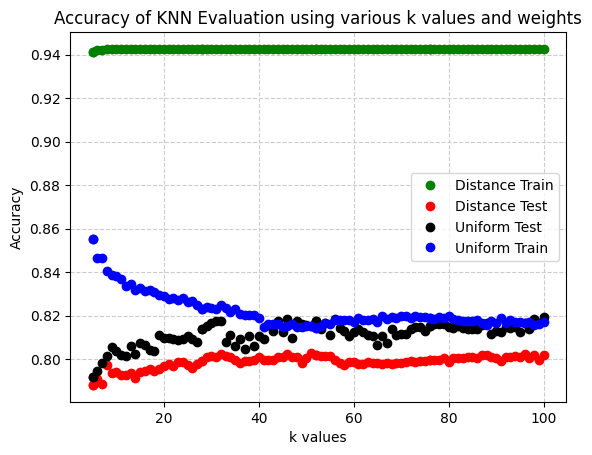

In [160]:

plt.plot(kvalues,distance_train,'go',label = 'Distance Train')
plt.plot(kvalues,distance_test,'ro',label = 'Distance Test')

plt.plot(kvalues,uniform_test,'ko',label = 'Uniform Test')
plt.plot(kvalues,uniform_train,'bo',label = 'Uniform Train')


plt.grid(linestyle='--',color=[.8,.8,.8])
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Evaluation using various k values and weights')
plt.legend()

In [173]:
maxdtrain = np.argmax(distance_train)
maxdtest = np.argmax(distance_test)
maxutrain = np.argmax(uniform_train)
maxutest = np.argmax(uniform_test)

maxdtrain_value = np.max(distance_train)
maxdtest_value = np.max(distance_test)
maxutrain_value = np.max(uniform_train)
maxutest_value = np.max(uniform_test)

print(maxdtrain_value)
print(maxdtest_value)
print(maxutrain_value)
print(maxutest_value)

0.9426218621330854
0.8029739776951673
0.8552264576969053
0.8194370685077005


In [172]:
dtrain_bestk = kvalues[maxdtrain]
dtest_bestk = kvalues[maxdtest]
utrain_bestk = kvalues[maxutrain]
utest_bestk = kvalues[maxutest]

print(dtrain_bestk)
print(dtest_bestk)
print(utrain_bestk)
print(utest_bestk)

9
51
5
100


In [177]:


knnclf = neighbors.KNeighborsClassifier(9, weights='distance')
knnclf.fit(csv_train_norm, csv_target_train.values.ravel())
bestpredict = knnclf.predict(csv_test_norm)
dtest = knnclf.score(csv_test_norm, csv_target_test)
dtrain = knnclf.score(csv_train_norm, csv_target_train)

In [178]:
print(dtest)
print(dtrain)

0.7934147636749868
0.9426218621330854


The best k value and weight combination for retrieving the highest accuracy appears to be when the training set has a k value of 9 and is weighted by distance. This returns an accuracy value 0.94 for the training set and 0.79 for the test set. Using a k value of 100 with a uniform weight would however lead the the highest accuracy for the test set. The reason for using the k=9 and distance parameters instead is because, the highest training set accuracy when using a uniform weight is only 0.86. This is a lot lower than 0.94. The difference between the highest possible accuracy value for the test sets regardless of weight (0.82) and the value exhibited when performing k=9 and distance parameters (0.79) is comparably smaller.

In [179]:
print(classification_report(csv_target_test, bestpredict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1443
           1       0.57      0.48      0.52       440

    accuracy                           0.79      1883
   macro avg       0.71      0.68      0.69      1883
weighted avg       0.78      0.79      0.79      1883



In [183]:
knncmbest = confusion_matrix(csv_target_test, bestpredict)
print (knncmbest)

[[1283  160]
 [ 229  211]]


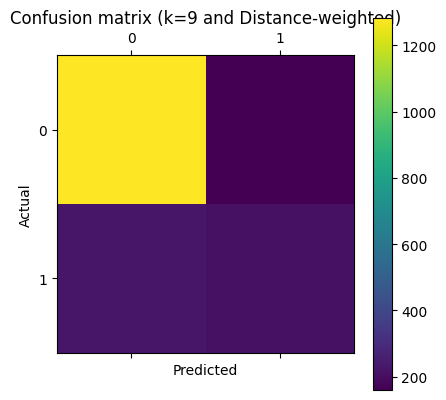

In [187]:
plt.matshow(knncmbest)
plt.title('Confusion matrix (k=9 and Distance-weighted)')
plt.colorbar()

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

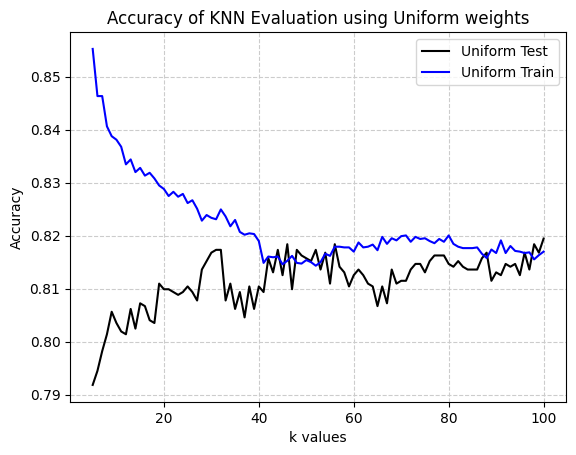

In [190]:

plt.plot(kvalues,uniform_test,'k-',label = 'Uniform Test')
plt.plot(kvalues,uniform_train,'b-',label = 'Uniform Train')


plt.grid(linestyle='--',color=[.8,.8,.8])
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Evaluation using Uniform weights')
plt.legend()

There appears to be overfitting occuring in the k range of 1 to 40. This is because the accuracy values in this range are high for the training data but low for the test data. While there are later ranges where training data is higher than test data, the largest gap appears in the first 40 k values. 

In [22]:
#c

#csv_train, csv_test, csv_target_train, csv_target_test

from sklearn import tree
import graphviz

In [27]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(csv_train, csv_target_train)
treepreds_test = treeclf.predict(csv_test)
print (treeclf.score(csv_test, csv_target_test))
print (treeclf.score(csv_train, csv_target_train))



0.77376526818906
0.9297383450657458


In [28]:
print(classification_report(csv_target_test, treepreds_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1443
           1       0.52      0.45      0.48       440

    accuracy                           0.77      1883
   macro avg       0.68      0.66      0.67      1883
weighted avg       0.76      0.77      0.77      1883



In [29]:
treecm = confusion_matrix(csv_target_test, treepreds_test, labels=[0,1])
print (treecm)

[[1258  185]
 [ 241  199]]


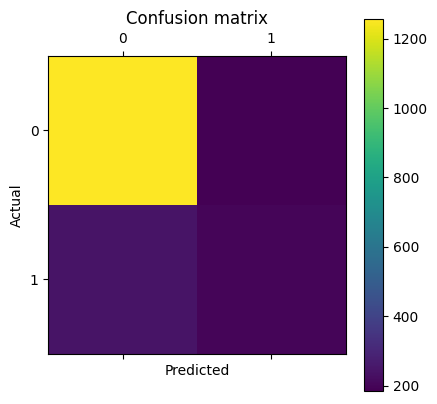

In [30]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The test set accuracy is 0.77376526818906, while the train set accuracy is much higher (0.9297383450657458). This suggests that there is a decent level of variance involved as the high traing and low testing scores indicate some level of overfitting. Without any bias however, this difference in accuracy values could be even larger as some level of bias is needed to prevent too much overfitting. Too much bias could however lead to the opposite problem and cause the model to not properly evaluate the the data sets and target values. 

In [31]:
treeclf2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10,max_depth=4)
treeclf2 = treeclf2.fit(csv_train, csv_target_train)
treepreds_test2 = treeclf2.predict(csv_test)
print (treeclf2.score(csv_test, csv_target_test))
print (treeclf2.score(csv_train, csv_target_train))

0.8167817312798725
0.8187010227121796


In [32]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf2,out_file='tree.dot', feature_names=csv_train.columns)

In [33]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()


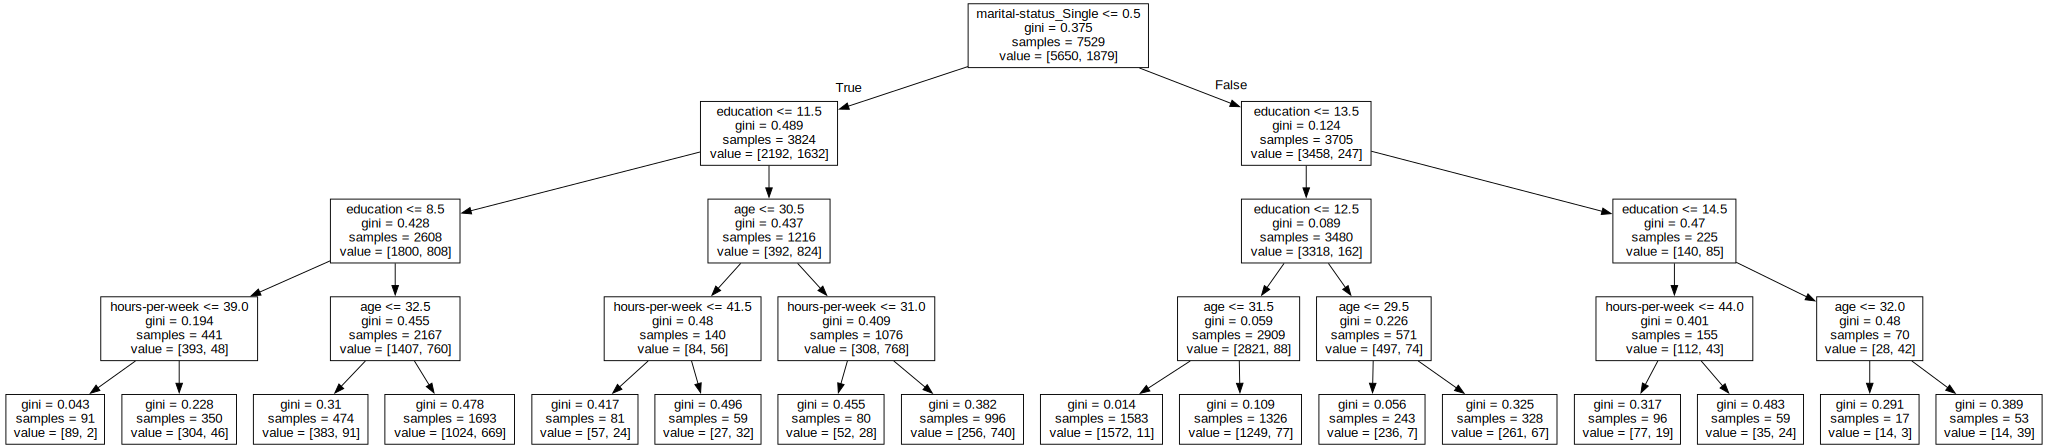

In [34]:
graphviz.Source(dot_graph)

In [35]:
from sklearn import naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
from sklearn import model_selection


In [37]:
#d
#csv_train, csv_test, csv_target_train, csv_target_test

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(csv_train, csv_target_train.values.ravel())
nbpreds_test = nbclf.predict(csv_test)
print (nbclf.score(csv_train, csv_target_train))
print (nbclf.score(csv_test, csv_target_test))

0.720547217425953
0.7190653212958046


In [42]:
Bayes_scores = model_selection.cross_val_score(nbclf, csv_train, csv_target_train.values.ravel(), cv=10)

In [44]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (Bayes_scores.mean(), Bayes_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


The accuracy of the model for the training set was 0.720547217425953 which is very similar to the cross validation version 0.72 (+/- 0.02)

In [46]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(csv_train, csv_target_train.values.ravel())
ldpreds_test = ldclf.predict(csv_test)
print (ldclf.score(csv_train, csv_target_train))

print (ldclf.score(csv_test, csv_target_test))

0.8063487846991633
0.8104089219330854


In [47]:
LDA_scores = model_selection.cross_val_score(ldclf, csv_train, csv_target_train.values.ravel(), cv=10)

In [48]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (LDA_scores.mean(), LDA_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.03)


The accuracy of the model for the training set was 0.8063487846991633 which is very similar to the cross validation version 0.81 (+/- 0.03)